In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
df=pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
df.shape

(14999, 10)

In [6]:
len(df[df['left']==1])

3571

In [7]:
df[df['left']==1].sample(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
131,0.38,0.57,2,140,3,0,1,0,support,low
145,0.41,0.46,2,151,3,0,1,0,product_mng,low
1159,0.11,0.95,7,269,5,0,1,0,sales,medium
1915,0.39,0.54,2,154,3,0,1,0,marketing,low
403,0.92,0.93,5,240,5,0,1,0,sales,low
1692,0.45,0.47,2,150,3,0,1,0,sales,low
683,0.86,0.98,3,158,5,0,1,0,sales,low
838,0.81,0.90,5,238,6,0,1,0,marketing,low
1098,0.42,0.48,2,132,3,0,1,0,hr,low
1387,0.40,0.50,2,135,3,0,1,0,sales,medium


In [8]:
len(df[df['left']==0])

11428

In [9]:
df.groupby('left').agg('mean', numeric_only=True) 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


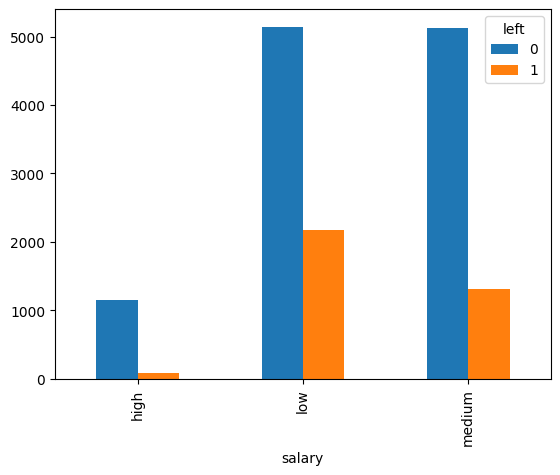

In [10]:
## IMPACT OF SALARY ON EMPLOYEE RETENTION
pd.crosstab(df.salary,df.left).plot(kind='bar')
plt.show()

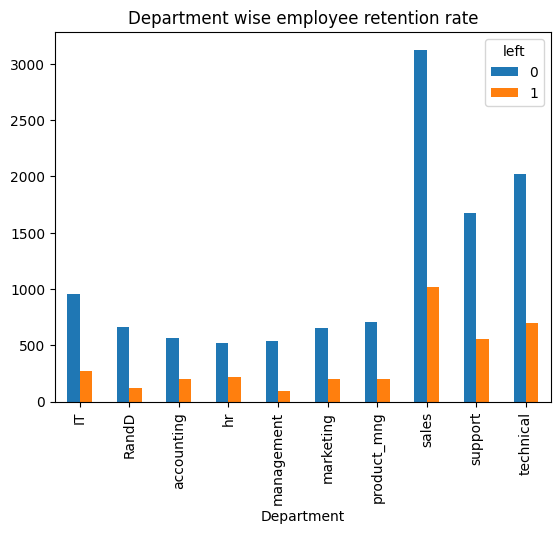

In [11]:
## IMPACT OF DEPARTMENT ON EMPLOYEE RETENTION
pd.crosstab(df.Department,df.left).plot(kind='bar')
plt.title('Department wise employee retention rate')
plt.show()

In [12]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [13]:
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")

In [14]:
df_with_dummies = pd.concat([subdf,salary_dummies],axis='columns')

In [15]:
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [16]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [17]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [18]:
y = df.left

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train, y_train)

LogisticRegression()

In [22]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], shape=(10500,))

In [23]:
model.score(X_test,y_test)

0.778952380952381